# Seattle Airbnb Open Data Study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime

## Business Understanding

**Listing a property on Airbnb can garantuee good income for the hosts, and offers good variety for the guests. Our Busniss questions will focus on the factors that help hosts increase their income from listing their properties on Airbnb. On the other hand how to get better reviews as a host which will make guests more satisfied. The main three questions are as following.**

1. How to gain more income from listing your property in Seattle?
2. How to get better review ratings?
3. How is the demand for Airbnb properties in Seattle?

## Exploring and Understaning Data

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Some of columns are not useful in EDA, we can drop them and focus only features we really interested in.

In [3]:
drop_columns=['id', 'listing_url', 'scrape_id','medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','name','host_thumbnail_url','host_picture_url','thumbnail_url']

Let's calculate the percentage of missing values in each column and drop the columns with high percentages.

In [4]:
missing_value_percent = df.isnull().mean()

In [5]:
missing_value_percent[missing_value_percent>0.4].sort_values()

notes               0.420639
weekly_price        0.473808
security_deposit    0.511262
monthly_price       0.602672
square_feet         0.974594
license             1.000000
dtype: float64

It's seen that all values are missing in 'licence' column, and 97.5% of 'square_feet' column is missing. Those two columns can be dropped.

A deeper look is needed in the columns that has 60% missing values or less before dropping them.

In [6]:
[drop_columns.append(i) for i in ['license','square_feet']]

[None, None]

Some of columns with desriptive content like 'summary', 'space', 'description', and the missing values of them are quite low, so it cannot help in creating new feature, so they can be dropped.

In [7]:
[drop_columns.append(i) for i in ['summary','space','description','neighborhood_overview','notes','transit','host_about']]

[None, None, None, None, None, None, None]

Some of columns has only one value or most of values belog to one category so we can drop them as they will not tell any correlation with other features.

In [8]:
[drop_columns.append(i) for i in ['experiences_offered','host_location','host_has_profile_pic','city','state','market','smart_location','country_code'
                    , 'country','requires_license','jurisdiction_names','has_availability','host_acceptance_rate']] 

[None, None, None, None, None, None, None, None, None, None, None, None, None]

Some columns have the same information like 'last_scraped' and 'calendar_last_scraped', so they can be dropped.

In [9]:
(df['last_scraped'] == df['calendar_last_scraped']).mean()

1.0

The same information in 'street' column can be extracted from 'zipcode' or 'neighbourhood' column. so we can drop them.   

In [10]:
[drop_columns.append(i) for i in ['street','zipcode','calculated_host_listings_count']] 

[None, None, None]

In [11]:
drop_columns

['id',
 'listing_url',
 'scrape_id',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'name',
 'host_thumbnail_url',
 'host_picture_url',
 'thumbnail_url',
 'license',
 'square_feet',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'experiences_offered',
 'host_location',
 'host_has_profile_pic',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'requires_license',
 'jurisdiction_names',
 'has_availability',
 'host_acceptance_rate',
 'street',
 'zipcode',
 'calculated_host_listings_count']

In [12]:
len(drop_columns)

38

In [13]:
df.drop(columns=drop_columns,index=1,inplace=True)
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2016-01-04,2011-08-11,within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07
2,2016-01-04,2014-06-12,within a few hours,67%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,1.15
3,2016-01-04,2013-11-06,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
4,2016-01-04,2011-11-29,within an hour,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,0.89
5,2016-01-04,2010-12-25,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2.45


## Preparing Data

**In this stage of the CRISP-DM process we will prepare our data to get the the information that concern our business questions.The following steps will be done to prepare the data for the modeling step.**
- Handling Missing Values
- Handeling Date Columns
- Handeling Numerical Features
- Handeling Categorical Features

### Handling Date Columns

For features with date time, we need to handle them in a way that can be useful.

In [14]:
date_cols = ['last_scraped','first_review','last_review','host_since']

In [15]:
last_scraped_date = pd.to_datetime(df['last_scraped'])
today_date = pd.to_datetime(datetime.datetime.now())

The missing values in 'host_since' column can be imputed with the mode value. The days since the host listed their property will be till the last scraped date.

In [16]:
df['host_since'] = df['host_since'].fillna(df['host_since'].mode()[0])
df['host_since_days'] = last_scraped_date - pd.to_datetime(df['host_since'])

In [17]:
df['host_since_days'] = df['host_since_days'].apply(lambda x: x.value/10**9/3600/24)

In [18]:
(df['host_since']).isnull().mean()

0.0

In [19]:
df['first_review'] = df['first_review'].fillna(today_date)
df['time_to_first_review'] = last_scraped_date - pd.to_datetime(df['first_review'])

In [20]:
df['time_to_first_review'] = df['time_to_first_review'].apply(lambda x: x.value/10**9/3600/24)

In [21]:
(df['host_since_days'] - df['time_to_first_review']).value_counts().sort_values(ascending=False)

9.000000       29
13.000000      28
19.000000      24
7.000000       24
8.000000       23
               ..
2056.515389     1
259.000000      1
689.000000      1
2525.515389     1
813.000000      1
Length: 1656, dtype: int64

In [22]:
df['last_review'] = df['last_review'].fillna(last_scraped_date)
df['time_from_last_review'] = last_scraped_date - pd.to_datetime(df['last_review'])

In [23]:
df['time_from_last_review'] = df['time_from_last_review'].apply(lambda x: x.value/10**9/3600/24)

<AxesSubplot:>

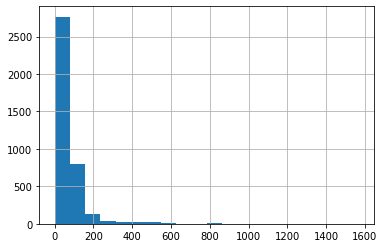

In [24]:
df['time_from_last_review'].hist(bins=20)

<AxesSubplot:>

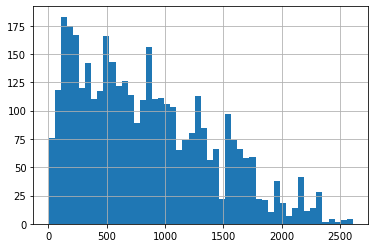

In [25]:
df['host_since_days'].hist(bins=50)

We see that the distribution of 'host_since' in days has no normal distribution pattern and the majority are new to Airbnb.

### Handeling Numerical Features

In [26]:
num_cols=['price','weekly_price','monthly_price','cleaning_fee']

for col in num_cols:
    df[col] = df[col].fillna('$0')
    df[f"{col}_number"] = df[col].apply(lambda x: x.replace('$',''))
    df[f"{col}_number"] = df[f"{col}_number"].apply(lambda x: x.replace(',',''))
    df[f"{col}_number"] = df[f"{col}_number"].astype(float)

In [27]:
df.drop(columns=num_cols,axis=1,inplace=True)

In [28]:
review_cols=['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']

In [29]:
df[review_cols].isnull().sum()

review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
dtype: int64

In [30]:
for col in review_cols:
    df[col] = df[col].fillna(df[col].mean())

In [31]:
df[review_cols].isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

### Handeling Categorical Features

In [32]:
cat_cols=['host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
        'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'security_deposit', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
        'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month']

In [33]:
cat_df=df[cat_cols]
cols_missing_values=[]
for col in cat_cols:
    if df[col].isnull().mean()>0:
        cols_missing_values.append(col)

In [34]:
cols_missing_values

['host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_identity_verified',
 'neighbourhood',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit']

In [35]:
df[cols_missing_values].isnull().sum().sort_values()

property_type                1
beds                         1
host_is_superhost            2
host_identity_verified       2
bedrooms                     6
bathrooms                   16
host_neighbourhood         300
neighbourhood              416
host_response_time         523
host_response_rate         523
security_deposit          1952
dtype: int64

For features with very low number of missing values, we can impute the missing value with the mode as it will not have significante effect.
For nieghbourhood and host_neighbourhood, we can drop the records with missing values as it is difficult to be imputed and they seem to have effect on the price.
For security deposit, A new feature can be created 'has_security_deposit'

In [36]:
for col in ['property_type','beds','host_is_superhost','host_identity_verified','bedrooms','bathrooms','host_response_time','host_response_rate']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [37]:
df[['property_type','beds','host_is_superhost','host_identity_verified','bedrooms','bathrooms','host_response_time','host_response_rate']].isnull().mean()

property_type             0.0
beds                      0.0
host_is_superhost         0.0
host_identity_verified    0.0
bedrooms                  0.0
bathrooms                 0.0
host_response_time        0.0
host_response_rate        0.0
dtype: float64

In [38]:
df.dropna(subset=['host_neighbourhood','neighbourhood'],axis=0,inplace=True)

In [39]:
df.isnull().mean()

last_scraped                        0.000000
host_since                          0.000000
host_response_time                  0.000000
host_response_rate                  0.000000
host_is_superhost                   0.000000
host_neighbourhood                  0.000000
host_listings_count                 0.000000
host_total_listings_count           0.000000
host_verifications                  0.000000
host_identity_verified              0.000000
neighbourhood                       0.000000
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
latitude                            0.000000
longitude                           0.000000
is_location_exact                   0.000000
property_type                       0.000000
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.000000
bedrooms                            0.000000
beds                                0.000000
bed_type  

In [40]:
df['same_neighbourhood'] = np.where(df['host_neighbourhood'] == df['neighbourhood'],1,0)

In [41]:
df['has_security_deposit'] = np.where(df['security_deposit'].isnull(),0,1)
df.drop(columns='security_deposit',inplace=True)

In [42]:
import seaborn as sns

We can get a quick view for the correlation between th features in our data set.

<AxesSubplot:>

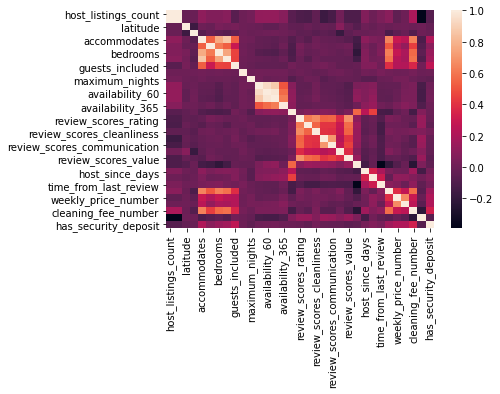

In [43]:
sns.heatmap(df.corr(),linewidths=0)

In [44]:
df['host_listings_count']

0         3.0
2         2.0
3         1.0
4         2.0
5         1.0
        ...  
3811      1.0
3812      3.0
3813    354.0
3814      1.0
3817      1.0
Name: host_listings_count, Length: 3399, dtype: float64

In [45]:
(df['host_total_listings_count'] == df['host_listings_count']).mean()

1.0

## Answering Business Questions

### How to gain more income from listing your property in Seattle?

We need to study the effect of factors related to the property that affect the price on Airbnb.

The first feature that infleunce the price is the neighbourhood. We see from the graph below that Fairmount Park has the highest average price among other neighbourhoods.
From the value counts of 'neighbourhood', we see that there is only one property in Fairmount Park. Further investigations needed to study the effect of neighbourhood in the areas where higher number of properties are located. 

In [104]:

def plotting_data(fig_size,xticks_rotatation,x_label,y_label,x,y,is_sorting,is_ascending):
    '''This function is plotting the graphs between different variable in dataset.
    inputs:
        - fig_size: set value for the figure in this format (width,hieght)
        - xticks_rotatation: integer with the angel to rotate the x tickets. 
        use 90 if a lot of labels on x-axis.
        - x_label: string for the label on x-axis.
        - y_label: string for the label on y-axis.
        - x: the x-axis data (dependent variable).
        - y: the y-axis data (independent variable).
        - is_ascending: a boolean variable to sort the values on x-axis in ascending way or not.
        - is_sorting: a boolean variable to sort the values on x-axis or not.
    '''
    plt.figure(figsize=fig_size)
    plt.xticks(rotation=xticks_rotatation)
    plt.xlabel(x_label,size=12,color='r')
    plt.ylabel(y_label,size=12,color='r')
    if is_sorting:
        plt.plot(df.groupby(x).mean()[y].sort_values(ascending = is_ascending))
    else:
        plt.plot(df.groupby(x).mean()[y])

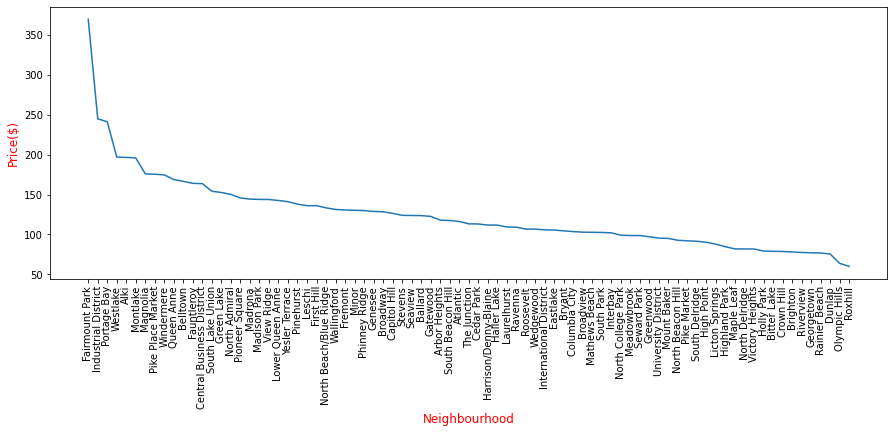

In [107]:
plotting_data(fig_size=(15,5),xticks_rotatation = 90,x_label ='Neighbourhood',y_label ="Price($)",
              x = 'neighbourhood',y='price_number',is_sorting = True,is_ascending = False)

In [49]:
df[df['neighbourhood']=='Industrial District']['price_number']

1924    265.0
1925    320.0
1926    150.0
Name: price_number, dtype: float64

In [50]:
df[df['neighbourhood']=='Industrial District']['property_type']

1924    Camper/RV
1925         Loft
1926        Other
Name: property_type, dtype: object

The first two neighbourhoods with highest average rates are high due to other factors. A boat in the case of Fairmount Park and RV in Industerial District.

The second neighbourhood with highest average price is 'Industrial District' with RV and Loft prperty type, which means that the neighbourhood does not necesarrily infeluence the price, but the needs of the guests and the availability of the property.

Second Factor that can contribute in determining the price of a listing on Airbnb is the property type. 

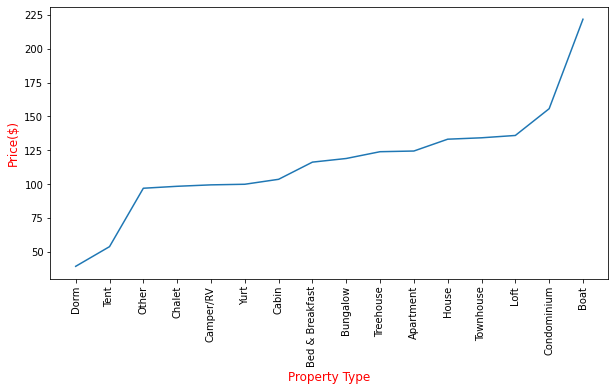

In [110]:
plotting_data(fig_size=(10,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Price($)",
              x = 'property_type',y='price_number',is_sorting = True,is_ascending = True)

From the curve, we see that a boat is the highest price among the other property types, which can be explained that it offers a special experience for the guest to stay a night on a boat with higher price rather than a normal apartment or a house.

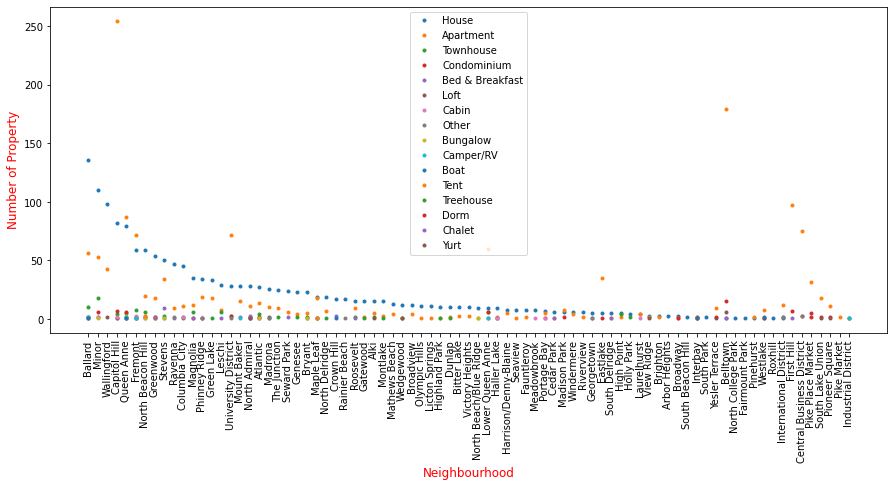

In [52]:
property_types = df['property_type'].value_counts().index
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Number of Property",size=12,color='r')
for property_type in property_types:
    plt.plot(df[df['property_type']==property_type]['neighbourhood'].value_counts(),'.')
    plt.legend(labels = property_types,loc='upper center')


The distribution of property types among all neighbourhoods shows that apartments stay in the first place but they don't give the highest revenue.

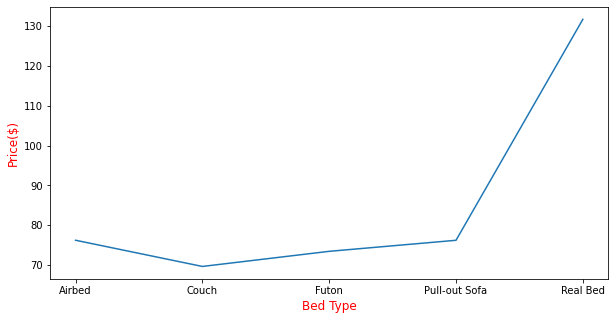

In [114]:
plotting_data(fig_size=(10,5),xticks_rotatation = 0,x_label ="Bed Type",y_label ="Price($)",
              x = 'bed_type',y='price_number',is_sorting = False,is_ascending = True)

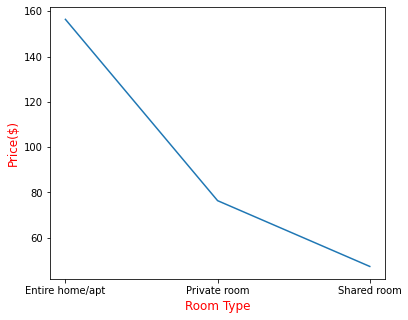

In [120]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Room Type",y_label ="Price($)",
              x = 'room_type',y='price_number',is_sorting = False,is_ascending = True)

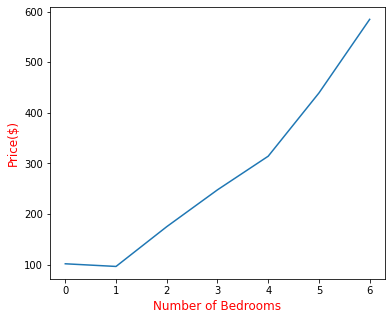

In [121]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Number of Bedrooms",y_label ="Price($)",
              x = 'bedrooms',y='price_number',is_sorting = False,is_ascending = True)

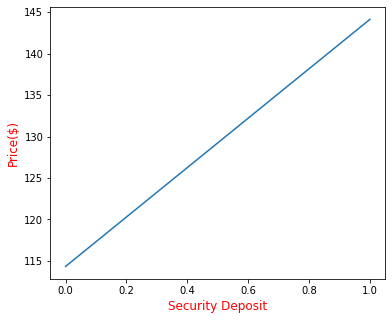

In [122]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Security Deposit",y_label ="Price($)",
              x = 'has_security_deposit',y='price_number',is_sorting = False,is_ascending = True)

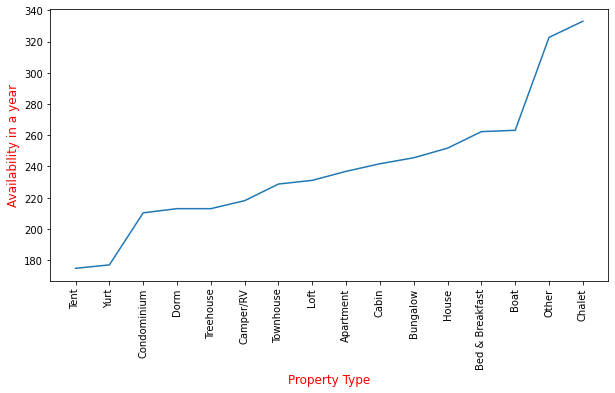

In [123]:
plotting_data(fig_size=(10,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Availability in a year",
              x = 'property_type',y='availability_365',is_sorting = True,is_ascending = True)

With respect to the availability during one year, we see that tent and yurt has low availability might be because they are quite few and related to the seasonal conditions. On the other hand, Condominuim has higher demand during the year and gain high revenue in the second place after 'boat'.
**Condomnuim is a good choice for a host to gain high income from Airbnb.**

### How to get better review ratings?

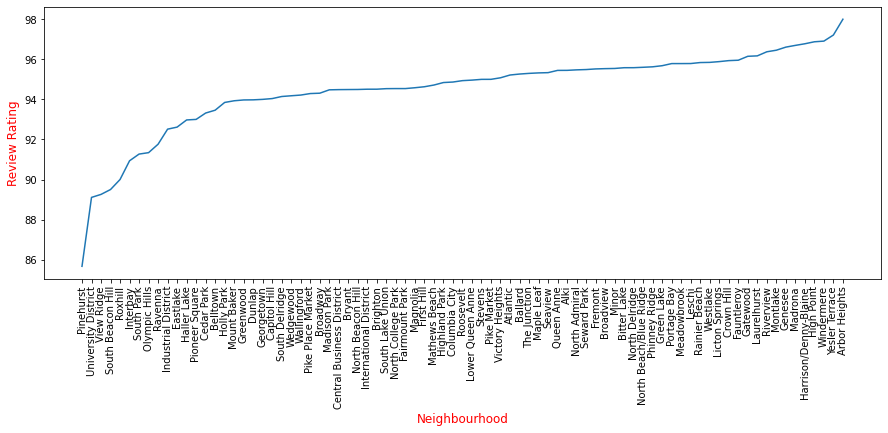

In [124]:
plotting_data(fig_size=(15,5),xticks_rotatation = 90,x_label ="Neighbourhood",y_label ="Review Rating",
              x = 'neighbourhood',y='review_scores_rating',is_sorting = True,is_ascending = True)

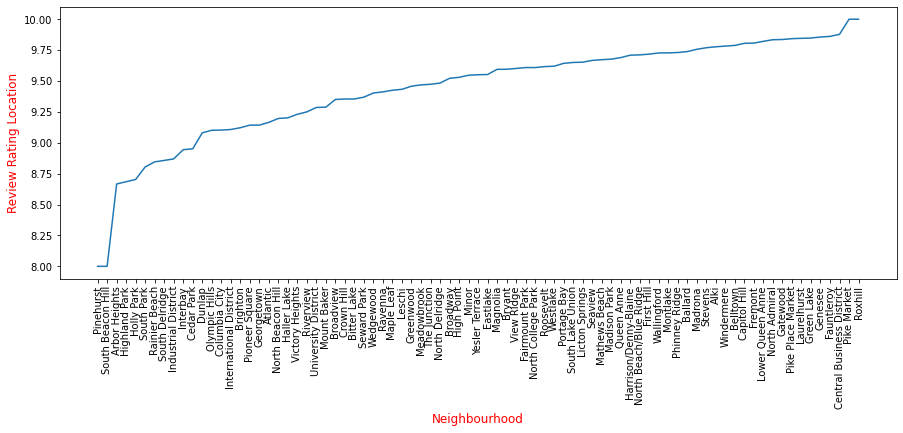

In [125]:
plotting_data(fig_size=(15,5),xticks_rotatation = 90,x_label ="Neighbourhood",y_label ="Review Rating Location",
              x = 'neighbourhood',y='review_scores_location',is_sorting = True,is_ascending = True)

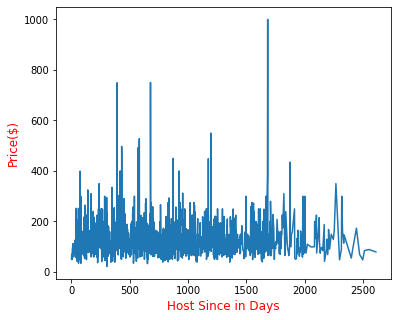

In [126]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Since in Days",y_label ="Price($)",
              x = 'host_since_days',y='price_number',is_sorting = False,is_ascending = True)

It seems that older hosts are not gaining more income than newer hosts.

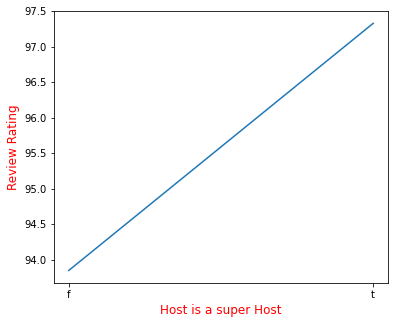

In [127]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host is a super Host",y_label ="Review Rating",
              x = 'host_is_superhost',y='review_scores_rating',is_sorting = False,is_ascending = True)

hosts who are super hosts are geting higher ratings.

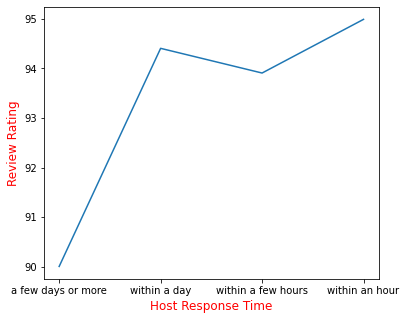

In [128]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Response Time",y_label ="Review Rating",
              x = 'host_response_time',y='review_scores_rating',is_sorting = False,is_ascending = True)

The response time is affecting the rating. The faster the hosts repond to the guests, the better ratings they have.

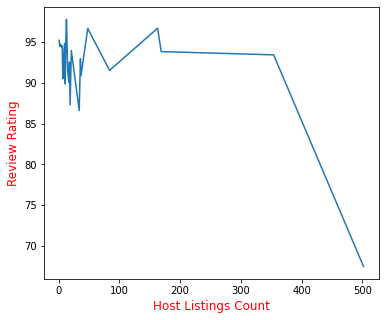

In [129]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Listings Count",y_label ="Review Rating",
              x = 'host_listings_count',y='review_scores_rating',is_sorting = False,is_ascending = True)

With higher number of listings, the review score falls dramatically.

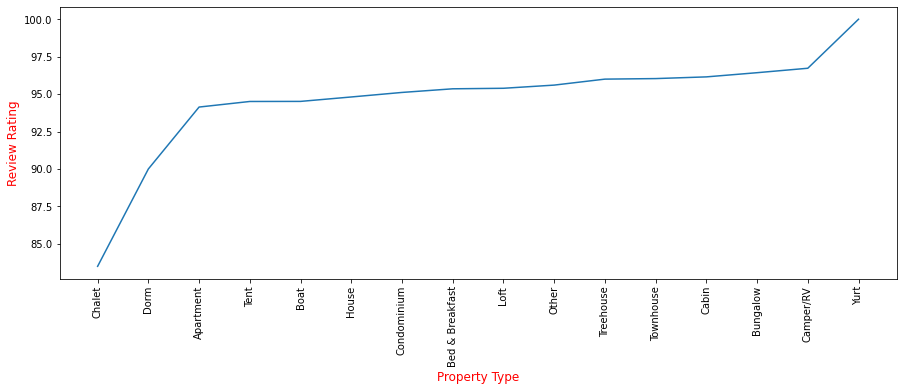

In [131]:
plotting_data(fig_size=(15,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Review Rating",
              x = 'property_type',y='review_scores_rating',is_sorting = True,is_ascending = True)

Most of the prperty types are in the same range of ratings except Chalet and Dorm with low ratings and yurt with higher rating. It seems that this is due to low number of these property types.

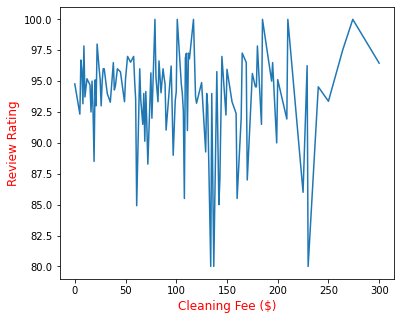

In [132]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Cleaning Fee ($)",y_label ="Review Rating",
              x = 'cleaning_fee_number',y='review_scores_rating',is_sorting = False,is_ascending = True)

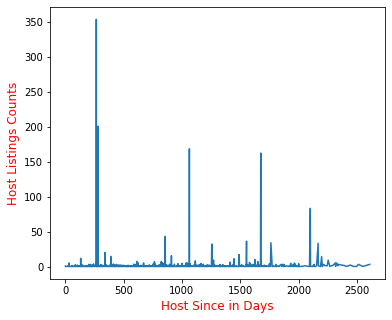

In [133]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Since in Days",y_label ="Host Listings Counts",
              x = 'host_since_days',y='host_listings_count',is_sorting = False,is_ascending = True)

Hosts with more experience have more knowledge about the market and they don't have higher listings count.

### How is the demand for Airbnb properties in Seattle? 

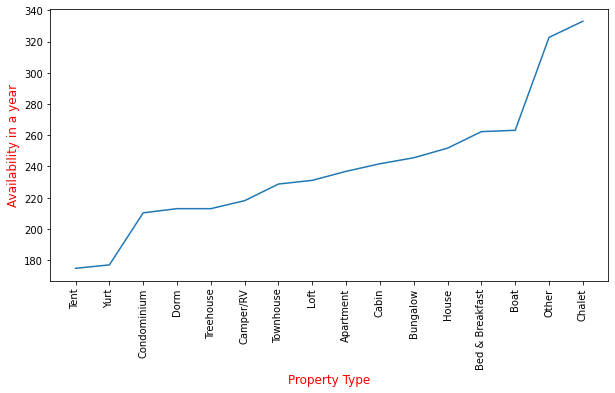

In [134]:
plotting_data(fig_size=(10,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Availability in a year",
              x = 'property_type',y='availability_365',is_sorting = True,is_ascending = True)

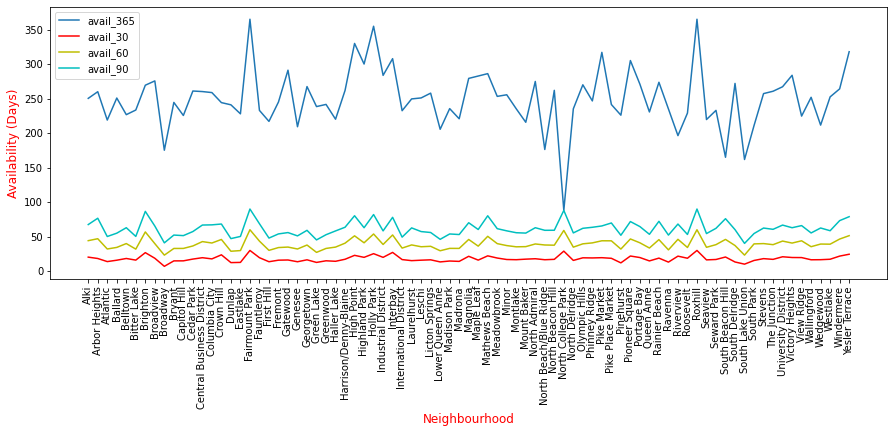

In [68]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Availability (Days)",size=12,color='r')
avail_365 = plt.plot(df.groupby('neighbourhood').mean()['availability_365'])
avail_30 =plt.plot(df.groupby('neighbourhood').mean()['availability_30'],'-r')
avail_60 =plt.plot(df.groupby('neighbourhood').mean()['availability_60'],'-y')
avail_90 =plt.plot(df.groupby('neighbourhood').mean()['availability_90'],'-c')
plt.legend(['avail_365','avail_30','avail_60','avail_90'])
plt.show()

The availability in 30 days, 60 days, and 90 days have the same pattern. The availability in a year is quite different, especially in North College Park. The availability drops yearly, unlike the monthly availability. This means that this neighborhood has a higher demand seasonally over the year.

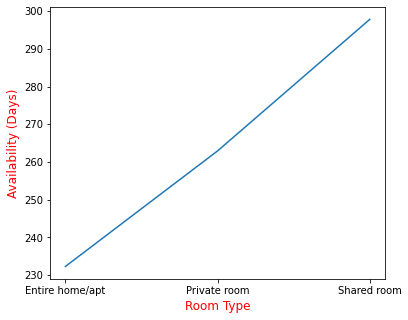

In [137]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Room Type",y_label ="Availability (Days)",
              x = 'room_type',y='availability_365',is_sorting = True,is_ascending = True)

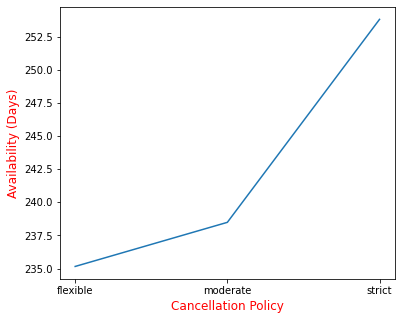

In [138]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Cancellation Policy",y_label ="Availability (Days)",
              x = 'cancellation_policy',y='availability_365',is_sorting = False,is_ascending = True)

The Entire home/apartment has higher demand over the year. Also the hosts who requires restrict cancellation policy don'y have higher demand on their properties.

### Preparing Features For Modeling

In this stage we will remove some of unnecessary columns and create dummy features for the categorical features.

In [71]:
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,...,reviews_per_month,host_since_days,time_to_first_review,time_from_last_review,price_number,weekly_price_number,monthly_price_number,cleaning_fee_number,same_neighbourhood,has_security_deposit
0,2016-01-04,2011-08-11,within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,...,4.070000,1607.0,1525.000000,2.0,85.0,0.0,0.0,0.0,1,0
2,2016-01-04,2014-06-12,within a few hours,67%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,...,1.150000,571.0,523.000000,123.0,975.0,0.0,0.0,300.0,1,1
3,2016-01-04,2013-11-06,within an hour,100%,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,2.079107,789.0,-2010.515389,0.0,100.0,650.0,2300.0,0.0,1,0
4,2016-01-04,2011-11-29,within an hour,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,0.890000,1497.0,1273.000000,72.0,450.0,0.0,0.0,125.0,1,1
5,2016-01-04,2010-12-25,within an hour,100%,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,2.450000,1836.0,207.000000,98.0,120.0,800.0,0.0,40.0,1,0


In [72]:
df.columns

Index(['last_scraped', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'can

In [73]:
drop=['last_scraped','host_since','host_total_listings_count','latitude','longitude','amenities','host_response_rate']
df.drop(columns=drop, inplace=True,axis=1)

In [74]:
df.drop(columns=['host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','first_review','last_review'],axis=1,inplace=True)

In [75]:
cat_cols=[]
for col in df.dtypes.index:
    if df.dtypes[col] == 'O':cat_cols.append(col)

In [76]:
cat_cols

['host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_identity_verified',
 'neighbourhood',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'extra_people',
 'calendar_updated',
 'calendar_last_scraped',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [77]:
df_dummies = pd.get_dummies(df[cat_cols],drop_first=True)

In [78]:
df_dummies.head()

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,"host_verifications_['email', 'facebook', 'reviews', 'jumio']","host_verifications_['email', 'facebook', 'reviews', 'kba']","host_verifications_['email', 'facebook', 'reviews']","host_verifications_['email', 'facebook']","host_verifications_['email', 'linkedin', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'amex', 'reviews', 'jumio']",...,calendar_updated_9 months ago,calendar_updated_a week ago,calendar_updated_never,calendar_updated_today,calendar_updated_yesterday,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
final_df = pd.concat([df.drop(columns=cat_cols,axis=1),df_dummies],axis=1)

In [80]:
final_df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,calendar_updated_9 months ago,calendar_updated_a week ago,calendar_updated_never,calendar_updated_today,calendar_updated_yesterday,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,...,0,0,0,0,0,0,1,0,0,0
2,2.0,11,4.5,5.0,7.0,10,4,30,1,6,...,0,0,0,0,0,0,0,1,0,0
3,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,...,0,0,0,0,0,0,0,1,0,0
5,1.0,2,1.0,1.0,1.0,1,1,6,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data Modeling

In [81]:
y = final_df['price_number']
X = final_df.drop(columns=['price_number'], axis=1)

In [82]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,calendar_updated_9 months ago,calendar_updated_a week ago,calendar_updated_never,calendar_updated_today,calendar_updated_yesterday,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,...,0,0,0,0,0,0,1,0,0,0
2,2.0,11,4.5,5.0,7.0,10,4,30,1,6,...,0,0,0,0,0,0,0,1,0,0
3,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,...,0,0,0,0,0,0,0,1,0,0
5,1.0,2,1.0,1.0,1.0,1,1,6,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[5.67811712e-03 7.80076969e-02 7.60300982e-02 2.13597163e-01
 3.66240009e-02 6.27408388e-03 4.09302533e-03 3.05285931e-03
 3.95516369e-03 3.49343748e-03 3.81165057e-03 4.27817252e-03
 3.61554980e-03 2.98713618e-03 1.99494425e-03 2.43470663e-03
 2.00372527e-03 1.98001259e-03 2.83643552e-03 2.88071081e-03
 5.18244277e-03 5.58290983e-03 5.36584008e-03 6.37903266e-03
 1.28663757e-01 2.38985817e-02 5.27994119e-02 1.70097088e-03
 3.34121425e-03 1.90092558e-03 2.93670171e-03 2.88714466e-03
 2.49521127e-03 1.47562615e-05 5.58698214e-06 2.75138028e-05
 4.67882818e-07 1.95815948e-06 2.32739912e-06 1.73444758e-05
 2.76179828e-06 5.04447024e-05 2.49948724e-05 6.95601590e-07
 2.07838090e-05 3.59591661e-04 2.92255035e-06 7.60963522e-04
 1.06002267e-06 2.99715793e-05 5.28611072e-04 4.27312164e-04
 4.48880257e-05 4.50150508e-05 6.41077333e-07 5.12315420e-04
 8.11678406e-05 1.60545801e-06 1.58891735e-04 3.60162168e-05
 1.18358711e-04 2.97425620e-05 9.04509201e-04 1.90147431e-03
 8.84191161e-05 4.347926

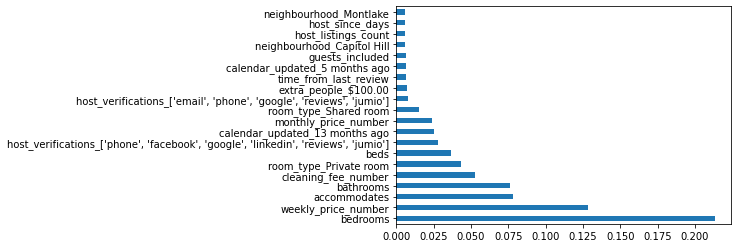

In [84]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [88]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [89]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [90]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [92]:
rf_random.best_score_

0.6708784743685925

In [93]:
most_important_feat = feat_importances.sort_values(ascending=False).index[:19]

In [94]:
X=final_df[most_important_feat]

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [97]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

## Evaluating Data Model

In [98]:
rf_random.best_score_

0.6721874445043208

In [99]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

**Using the most important features and using all features gives the same score.**

Now we will predict using our model to determine the R2 score for test data set and train data set.

In [100]:
y_pred= rf_random.predict(X_test)

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6586723445074789

In [102]:
y_pred_train=rf_random.predict(X_train)

In [103]:
r2_score(y_train,y_pred_train)

0.8168764385035208

**The R2 for training is 81%, while the R2 for testing data set is 64.5 %. It seems that we have over-fitting problem.**